<a href="https://colab.research.google.com/github/dhyannn/Deep-learning/blob/main/514_DLprog7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from keras.preprocessing import image
import glob
import math
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D,Dropout, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import sklearn
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from os import listdir
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, models, layers
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dropout, Add, Activation, Dense, Flatten, MaxPooling2D, Conv2D
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix


In [ ]:
path= "TB_Chest_Radiography_Database"
os.listdir(path)

['Normal',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'Tuberculosis',
 'Tuberculosis.metadata.xlsx']

In [ ]:
tuberculosis_data= "TB_Chest_Radiography_Database/Tuberculosis"
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= "TB_Chest_Radiography_Database/Normal"
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

tuberculosis images :
 ['Tuberculosis-1.png', 'Tuberculosis-10.png', 'Tuberculosis-100.png', 'Tuberculosis-101.png', 'Tuberculosis-102.png']

normal images :
 ['Normal-1.png', 'Normal-10.png', 'Normal-100.png', 'Normal-1000.png', 'Normal-1001.png']


In [ ]:
print(len(os.listdir(tuberculosis_data)))
print(len(os.listdir(normal_data)))

700
3500


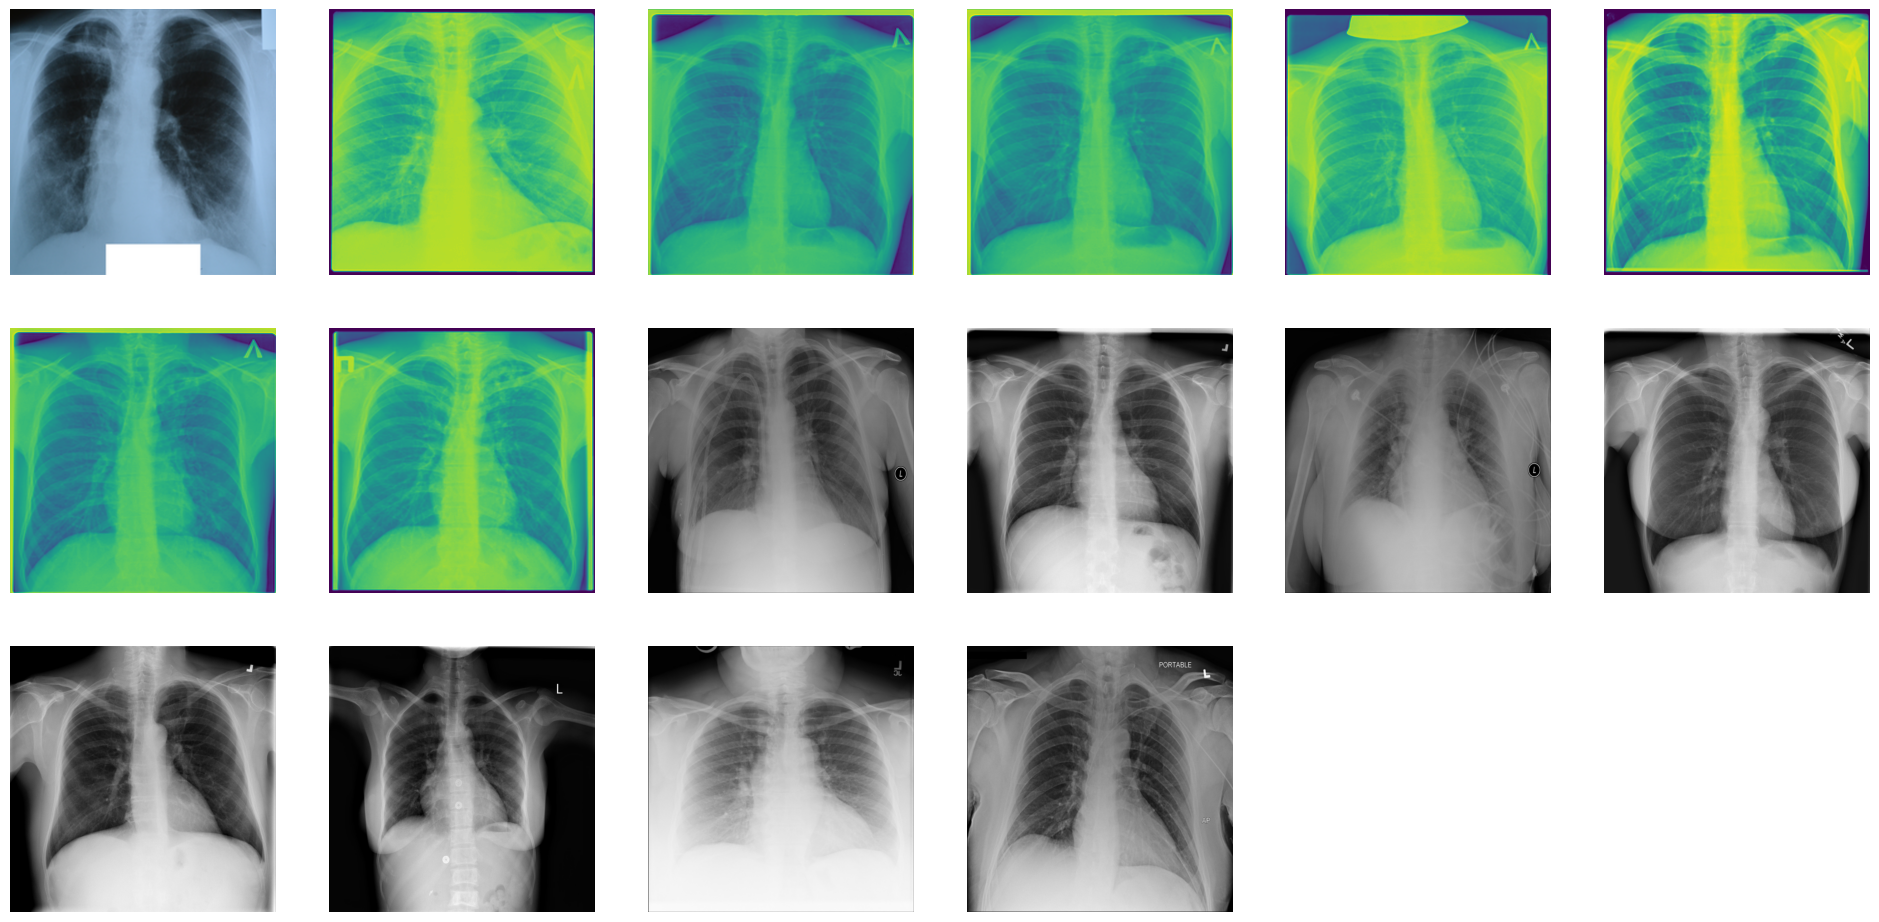

In [ ]:
rows= 5
cols= 6
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(cols*4, rows*4)
pic_index+=8

tuberculosis_img = [os.path.join(tuberculosis_data, image) for image in os.listdir(tuberculosis_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(tuberculosis_img+normal_img):
    sp = plt.subplot(rows, cols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [ ]:
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.2,  width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True,  validation_split = 0.2)

train_data = train_datagen.flow_from_directory(path, target_size= (64,64), class_mode= "binary", batch_size=32, subset= "training")


training data :
Found 3360 images belonging to 2 classes.


In [ ]:
print("validation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= train_datagen.flow_from_directory(path, target_size= (64,64), class_mode= "binary", batch_size=32, shuffle= False, subset= "validation")

validation data :
Found 840 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu', padding="same", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())


model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 9, 9, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,849 (526.75 KB)

 Trainable params: 134,849 (526.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def residual_block(x, filters=16, kernel_size=3, strides=1, use_dropout=False):
    y = layers.Conv2D(filters=16, kernel_size=kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation('relu')(y)

    y = layers.Conv2D(filters=16, kernel_size=kernel_size, strides=1, padding='same')(y)
    y = layers.BatchNormalization()(y)

    # Adjust dimensions of x to match those of y if necessary
    if strides > 1:
        x = layers.Conv2D(filters=16, kernel_size=1, strides=strides, padding='same')(x)

    # Perform addition
    out = Add()([x, y])
    out = layers.Activation('relu')(out)

    if use_dropout:
        out = layers.Dropout(0.5)(out)

    return out


In [ ]:
def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = residual_block(x, filters=32)
    x = residual_block(x, filters=32)
    x = layers.MaxPooling2D((2, 2))(x)

    x = residual_block(x, filters=64, strides=2, use_dropout=True)
    x = residual_block(x, filters=64, use_dropout=True)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    return model

input_shape = (64, 64, 3)
num_classes = 1
resnet_model = build_resnet(input_shape, num_classes)
resnet_model.summary()

Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │        448 │ input_layer_6[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 32, 32,    │          0 │ conv2d_21[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32,    │      2,320 │ max_pooling2d_15… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_22[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │      2,320 │ activation_3[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_23[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 32, 32,    │          0 │ max_pooling2d_15… │
│                     │ 16)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 32, 32,    │          0 │ add_2[0][0]       │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │      2,320 │ activation_4[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_24[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 32, 32,    │      2,320 │ activation_5[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_25[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 32, 32,    │          0 │ activation_4[0][… │
│                     │ 16)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 32, 32,    │          0 │ add_3[0][0]     

 Total params: 36,305 (141.82 KB)

 Trainable params: 36,049 (140.82 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15


C:\Users\DESTOP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 81s 714ms/step - accuracy: 0.8249 - loss: 0.5488 - val_accuracy: 0.8333 - val_loss: 0.4751
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 350ms/step - accuracy: 0.8270 - loss: 0.4105 - val_accuracy: 0.8429 - val_loss: 0.9771
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 356ms/step - accuracy: 0.8408 - loss: 0.4560 - val_accuracy: 0.8405 - val_loss: 0.3971
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 287ms/step - accuracy: 0.9058 - loss: 0.2752 - val_accuracy: 0.8619 - val_loss: 0.3292
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 31s 284ms/step - accuracy: 0.9184 - loss: 0.2212 - val_accuracy: 0.8631 - val_loss: 0.3469
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 35s 316ms/step - accuracy: 0.9204 - loss: 0.2103 - val_accuracy: 0.8869 - val_loss: 0.2630
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 344ms/step - accuracy: 0.9291 - loss: 0.1999 - val_accuracy: 0.8667 - val_loss: 0.2837
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 37s 332ms/step - accuracy: 0.9210 - loss: 0.1900 - val

In [ ]:
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
resnet_model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 292ms/step - accuracy: 0.7913 - loss: 1.0282 - val_accuracy: 0.1667 - val_loss: 0.7346
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 33s 296ms/step - accuracy: 0.9146 - loss: 0.2586 - val_accuracy: 0.3048 - val_loss: 0.8650
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 36s 327ms/step - accuracy: 0.9203 - loss: 0.2176 - val_accuracy: 0.2976 - val_loss: 1.3191
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 36s 322ms/step - accuracy: 0.9442 - loss: 0.1632 - val_accuracy: 0.8512 - val_loss: 0.4043
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 36s 332ms/step - accuracy: 0.9378 - loss: 0.1912 - val_accuracy: 0.8690 - val_loss: 0.3310
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 37s 333ms/step - accuracy: 0.9411 - loss: 0.1655 - val_accuracy: 0.1667 - val_loss: 5.2005
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 48s 444ms/step - accuracy: 0.9459 - loss: 0.1628 - val_accuracy: 0.8643 - val_loss: 0.4766
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 50s 456ms/step - accuracy: 0.9508 - loss: 0

In [ ]:
steps = int(np.ceil(val_data.samples / val_data.batch_size))
prediction = model.predict(val_data, steps=steps, verbose=2)
prediction = (prediction > 0.5)
prediction

27/27 - 5s - 195ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
steps = int(np.ceil(val_data.samples / val_data.batch_size))
prediction1 = resnet_model.predict(val_data, steps=steps, verbose=2)
prediction1 = (prediction1 > 0.5)
prediction1

27/27 - 5s - 197ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
val_labels1=val_data.classes
val_labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
sample=resnet_model.evaluate(train_data)

105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 228ms/step - accuracy: 0.9399 - loss: 0.2375


In [ ]:
cnn=model.evaluate(train_data)

105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.9500 - loss: 0.1506


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

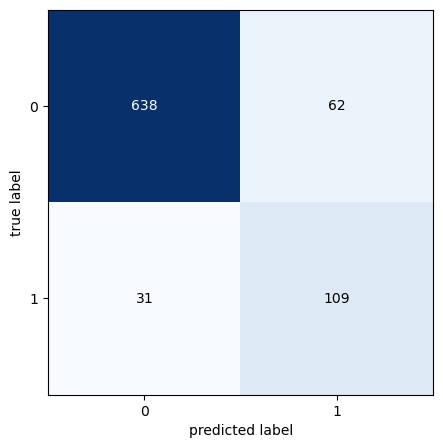

In [ ]:
cm= confusion_matrix(val_data.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))

(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

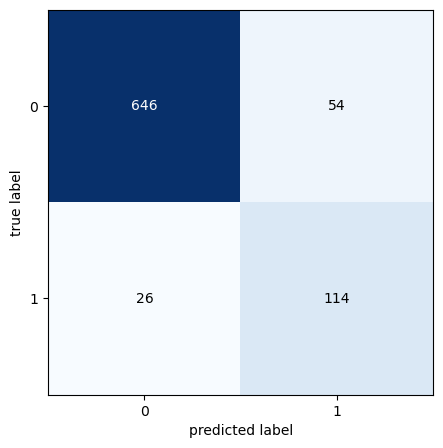

In [ ]:
cm= confusion_matrix(val_data.classes, prediction1)
plot_confusion_matrix(cm, figsize=(5,5))

In [ ]:
print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

0.8892857142857142
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       700
           1       0.64      0.78      0.70       140

    accuracy                           0.89       840
   macro avg       0.80      0.84      0.82       840
weighted avg       0.90      0.89      0.89       840



In [ ]:
print(accuracy_score(val_data.classes, prediction1))
print(classification_report(val_data.classes, prediction1))

0.9047619047619048
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       700
           1       0.68      0.81      0.74       140

    accuracy                           0.90       840
   macro avg       0.82      0.87      0.84       840
weighted avg       0.91      0.90      0.91       840

